# Application area review

In the context of predicting Bitcoin prices using sentiment analysis of Twitter data, AI has been applied through:

1. **Sentiment Analysis Models:**
   - Utilizing Natural Language Processing (NLP) techniques and machine learning algorithms (e.g., Naive Bayes, Logistic Regression, Random Forest) for sentiment analysis on Twitter data.

2. **Feature Extraction:**
   - Extracting relevant features from tweets, including user details, engagement metrics, and textual content, to enhance the model's understanding.

3. **Time Series Analysis:**
   - Applying time series analysis techniques to capture temporal patterns in tweet sentiments and Bitcoin price movements.

4. **Ensemble Learning:**
   - Employing ensemble methods to combine various algorithms, improving overall predictive performance.

5. **Data Preprocessing:**
   - Using AI for data preprocessing tasks like text normalization, handling missing values, and addressing outliers in the Twitter dataset.

6. **Hyperparameter Optimization:**
   - Optimizing model performance through hyperparameter tuning techniques such as grid search or random search.

7. **Explainability and Interpretability:**
   - Incorporating Explainable AI (XAI) methods to make model predictions interpretable, using techniques like LIME or SHAP.

8. **Continuous Learning:**
   - Designing models for continuous learning, allowing them to adapt to changing sentiment patterns and market dynamics.

In summary, AI techniques in sentiment analysis, feature extraction, ensemble learning, and model optimization contribute to robust predictions in the dynamic domain of Bitcoin price forecasting using Twitter data.

In this implementation, we will be using Natural Language Processing techniques such as Logistic Regression, Naive Bayes, Random forest, and Support vector machine algorithms to get the sentiment analysis of the current market.


In [24]:
# Install Requirements
%pip install -r requirements.txt

import os
import numpy as np
import pandas as pd
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

from sklearn.metrics import classification_report, confusion_matrix
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\avish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Compare and evaluate AI techniques

### Predicting Bitcoin Prices with Sentiment Analysis

In the context of predicting Bitcoin prices based on sentiment analysis of Twitter data, four AI techniques were explored: Naive Bayes, Logistic Regression, Random Forest, and Support Vector Machines.

1. **Naive Bayes:**
   - **Real World Problems:**
     - Predicting cryptocurrency market trends by analyzing sentiments expressed in tweets.

   - **Inputs/Outputs:**
     - Inputs include tweet text, polarity score, sentiment.
     - Output is a sentiment label (positive, negative, neutral) for each tweet.

   - **Pros and Cons:**
     - *Pros:* Simplicity, fast training, and efficiency with text classification tasks.
     - *Cons:* Assumes independence of features, may not capture complex relationships.

2. **Logistic Regression:**
   - **Real World Problems:**
     - Forecasting Bitcoin prices by leveraging sentiment analysis on Twitter data.

   - **Inputs/Outputs:**
     - Inputs include tweet text, polarity score, sentiment.
     - Output is a probability score representing the likelihood of a certain sentiment.

   - **Pros and Cons:**
     - *Pros:* Simplicity, interpretable results, suitable for binary classification.
     - *Cons:* Assumes a linear relationship, may not handle non-linear patterns well.

3. **Random Forest:**
   - **Real World Problems:**
     - Enhancing Bitcoin price predictions through sentiment analysis of Twitter data.

   - **Inputs/Outputs:**
     - Inputs include tweet text, polarity score, sentiment.
     - Output is a prediction of Bitcoin price movements based on aggregated results from multiple decision trees.

   - **Pros and Cons:**
     - *Pros:* Robustness, handles non-linearity, less prone to overfitting.
     - *Cons:* Complexity, computational intensity, may be challenging to interpret.

4. **Support Vector Machines (SVM):**
   - **Real World Problems:**
     - Predicting Bitcoin prices based on sentiment analysis of Twitter data.

   - **Inputs/Outputs:**
     - Inputs include tweet text, polarity score, sentiment.
     - Outputs are predictions of sentiment polarity for each tweet.

   - **Pros and Cons:**
     - *Pros:* Effective in high-dimensional spaces, versatile with different kernel functions.
     - *Cons:* May be sensitive to noise, computational complexity.

These AI techniques address the challenge of predicting cryptocurrency market trends using sentiment analysis, where the inputs involve diverse features extracted from Twitter data. Each technique has its strengths and weaknesses, influencing factors such as simplicity, interpretability, and the ability to capture complex relationships in the data.


# Implementation

The dataset employed in this study comprises approximately 80,000 tweets related to cryptocurrencies. However, the dataset lacks sentiment labels for each tweet. To address this, we will leverage the Natural Language Toolkit (NLTK) with the VADER sentiment analysis model. VADER has demonstrated higher accuracy in predicting sentiments, making it an optimal choice for assigning polarity and sentiment to the cleaned data.

After performing data cleaning, a new dataset is generated, which includes the tweet text, polarity score, and assigned sentiment. Given the substantial size of the dataset, we have divided the data into three sets: 60% for training, 20% for validation, and 20% for testing purposes.

### High level diagram

![High level diagram](highLevel.png)


## Preparation of the data

In [25]:
def clean_tweet(tweet: str) -> str:
    """
    Cleans a tweet by removing special characters, emojis, and links.

    Parameters:
    tweet (str): The tweet to clean.

    Returns:
    str: The cleaned tweet.
    """
    if not isinstance(tweet, str):
        raise ValueError('Input to clean_tweet must be a string')

    # Remove special characters but keep the text
    tweet = remove_special_characters(tweet)
    # Remove emojis
    tweet = remove_emoji(tweet)
    # Remove any links
    tweet = remove_links(tweet)

    return tweet.strip()

def remove_special_characters(text: str) -> str:
    return text.replace("\n", " ").replace("#", "").replace("_", " ").replace("@", "").replace('&amp;', 'and')

def remove_links(text: str) -> str:
    return re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)

def remove_emoji(text):
    """
    Remove emojis from a text string.

    Parameters:
    text (str): The text from which to remove emojis.

    Returns:
    str: The text with all emojis removed.
    """
    if not isinstance(text, str):
        raise ValueError('Input to remove_emoji must be a string')

    emoji_pattern = re.compile("[" 
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)  # no emoji

In [26]:
# Check if the cleaned and sentiment calculated tweets file exists
if os.path.exists("tweets.csv"):
    # Load the cleaned and sentiment calculated tweets
    tweets = pd.read_csv("tweets.csv")

# Prepare the data for model training
X = tweets["textcol"]
Y = tweets["sentiment"]

# Check the data
tweets.info()
tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   textcol    80000 non-null  object 
 1   polarity   80000 non-null  float64
 2   sentiment  80000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


,textcol,polarity,sentiment
0,49That spaces was so bad for crypto. Save the ...,0.0538,neutral
1,whitelist Detailed MorghadeG atowerises crypto...,0.0000,neutral
2,som cyptocurrency btc eth crypto W Leone new a...,0.4215,positive
3,renezive Crypto Inside NftMeta News Done,0.0000,neutral
4,el crypto prof They aren’t the same pattern…si...,0.0000,neutral


In [27]:
# Check if X and Y are the same length
if len(X) != len(Y):
    raise ValueError("Inputs X and Y must be the same length")

# Split the data into training and testing sets
# The test_size parameter specifies the proportion of the data to be used for testing, which is 20% in this case
# The random_state parameter ensures that the splits generate are reproducible

# First split: 60% training, 40% temporary
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)

# Second split: 50% validation (20% of total), 50% testing (20% of total)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the shapes of the training and testing sets
print(f"Training set shapes: X={X_train.shape}, Y={Y_train.shape}")
print(f"Validation set shapes: X={X_val.shape}, Y={Y_val.shape}")
print(f"Testing set shapes: X={X_test.shape}, Y={Y_test.shape}")

Training set shapes: X=(48000,), Y=(48000,)
Validation set shapes: X=(16000,), Y=(16000,)
Testing set shapes: X=(16000,), Y=(16000,)


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# Check if X_train and Y_train are the same length
if len(X_train) != len(Y_train):
    raise ValueError("Inputs X_train and Y_train must be the same length")

# Vectorize the text data
# This converts the text data into a matrix of token counts, which is necessary for training the classifier
vectorizer = CountVectorizer()

# Check if the model file exists
if os.path.exists("lr_classifier_model.pkl"):
    # Load the Logistic Regression classifier from the file
    with open("lr_classifier_model.pkl", "rb") as file:
        lr_classifier = pickle.load(file)
    # Load the vectorizer from the file
    with open("lr_vectorizer.pkl", "rb") as file:
        vectorizer = pickle.load(file)
else:
    # If the model file does not exist, train the Logistic Regression classifier
    X_train_vectorized = vectorizer.fit_transform(X_train)
    lr_classifier = LogisticRegression(max_iter=1000)
    lr_classifier.fit(X_train_vectorized, Y_train)

    # Save the trained model as a pickle file
    with open("lr_classifier_model.pkl", "wb") as file:
        pickle.dump(lr_classifier, file)
    with open("lr_vectorizer.pkl", "wb") as file:
        pickle.dump(vectorizer, file)

# Vectorize the test data
# This converts the test data into a matrix of token counts, which is necessary for making predictions
X_test_vectorized = vectorizer.transform(X_test)

# Predict the sentiment labels for the test data
Y_pred = lr_classifier.predict(X_test_vectorized)
# Evaluate the accuracy of the model
lr_val_accuracy = np.mean(Y_pred == Y_test)
print("Accuracy:", lr_val_accuracy)

# Print a classification report and a confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.895125
Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.71      0.77      2262
     neutral       0.88      0.94      0.91      6276
    positive       0.92      0.92      0.92      7462

    accuracy                           0.90     16000
   macro avg       0.88      0.85      0.87     16000
weighted avg       0.89      0.90      0.89     16000



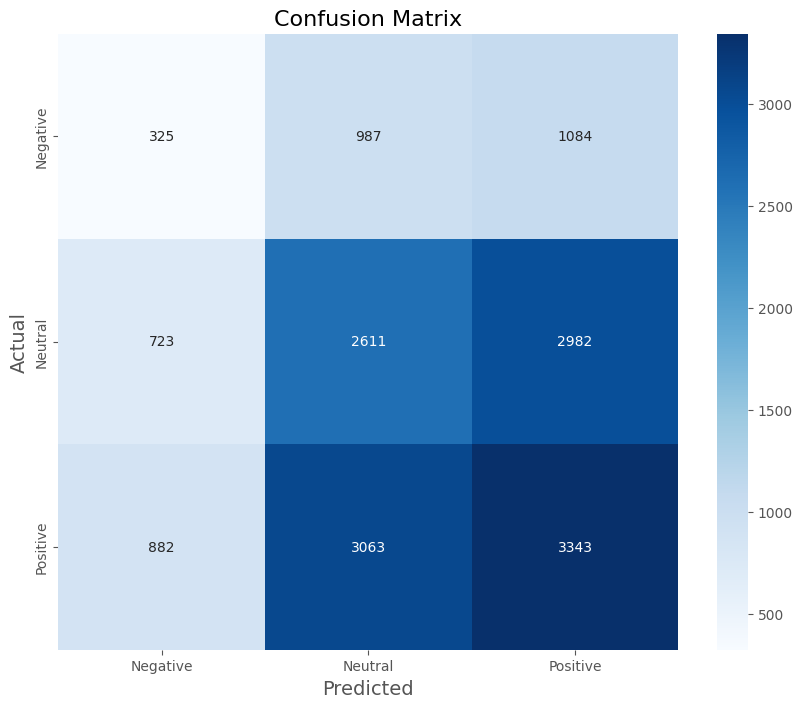

In [29]:
# Check if Y_test and Y_pred are the same length
if len(Y_test) != len(Y_pred):
    raise ValueError("Inputs Y_test and Y_pred must be the same length")

# Calculate the confusion matrix
# A confusion matrix is a table that is often used to describe the performance of a classification model
confusion_mat = confusion_matrix(Y_val, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"],
            cbar=True)

# Increase the font size of the labels and the title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

plt.show()

## Naive Bayes

In [30]:
# Check if X_train and Y_train are the same length
if len(X_train) != len(Y_train):
    raise ValueError("Inputs X_train and Y_train must be the same length")

# Vectorize the text data
# This converts the text data into a matrix of token counts, which is necessary for training the classifier
vectorizer = CountVectorizer()

# Check if the model file exists
if os.path.exists("nb_classifier_model.pkl"):
    # Load the Logistic Regression classifier from the file
    with open("nb_classifier_model.pkl", "rb") as file:
        nb_classifier = pickle.load(file)
    # Load the vectorizer from the file
    with open("nb_vectorizer.pkl", "rb") as file:
        vectorizer = pickle.load(file)
else:
    # If the model file does not exist, train the Logistic Regression classifier
    X_train_vectorized = vectorizer.fit_transform(X_train)
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_vectorized, Y_train)

    # Save the trained model as a pickle file
    with open("nb_classifier_model.pkl", "wb") as file:
        pickle.dump(nb_classifier, file)
    with open("nb_vectorizer.pkl", "wb") as file:
        pickle.dump(vectorizer, file)

# Vectorize the test data
# This converts the test data into a matrix of token counts, which is necessary for making predictions
X_test_vectorized = vectorizer.transform(X_test)

# Predict the sentiment labels for the test data
Y_pred = nb_classifier.predict(X_test_vectorized)
# Evaluate the accuracy of the model
nb_val_accuracy = np.mean(Y_pred == Y_test)
print("Accuracy:", nb_val_accuracy)

# Print a classification report and a confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.773625
Classification Report:
               precision    recall  f1-score   support

    negative       0.60      0.69      0.64      2262
     neutral       0.87      0.69      0.77      6276
    positive       0.77      0.87      0.81      7462

    accuracy                           0.77     16000
   macro avg       0.75      0.75      0.74     16000
weighted avg       0.79      0.77      0.77     16000



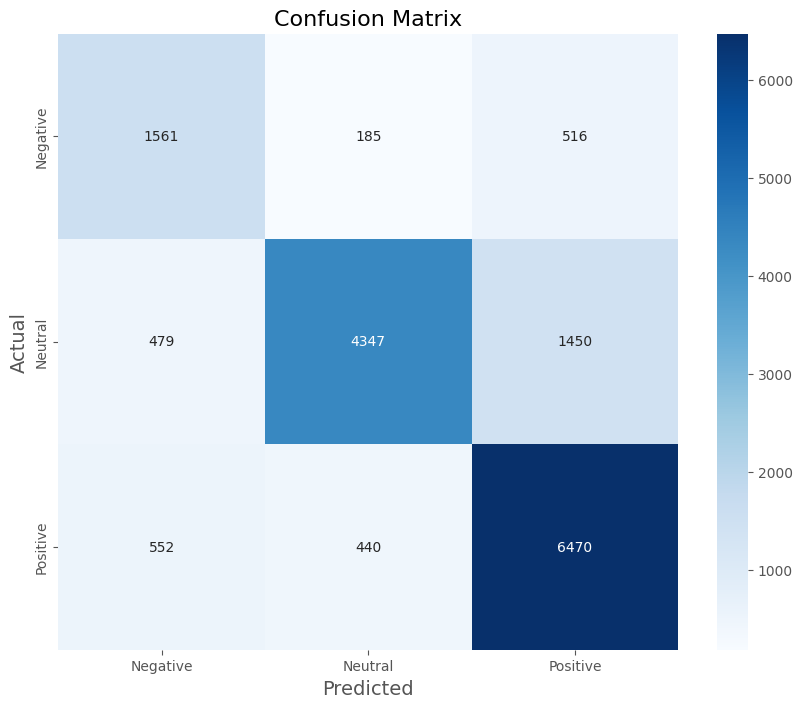

In [31]:
# Check if Y_test and Y_pred are the same length
if len(Y_test) != len(Y_pred):
    raise ValueError("Inputs Y_test and Y_pred must be the same length")

# Calculate the confusion matrix
# A confusion matrix is a table that is often used to describe the performance of a classification model
confusion_mat = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"],
            cbar=True)

# Increase the font size of the labels and the title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

plt.show()

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Check if X_train and Y_train are the same length
if len(X_train) != len(Y_train):
    raise ValueError("Inputs X_train and Y_train must be the same length")

# Vectorize the text data
# This converts the text data into a matrix of token counts, which is necessary for training the classifier
vectorizer = CountVectorizer()

# Check if the model file exists
if os.path.exists("rf_classifier_model.pkl"):
    # Load the Logistic Regression classifier from the file
    with open("rf_classifier_model.pkl", "rb") as file:
        rf_classifier = pickle.load(file)
    # Load the vectorizer from the file
    with open("rf_vectorizer.pkl", "rb") as file:
        vectorizer = pickle.load(file)
else:
    # If the model file does not exist, train the Logistic Regression classifier
    X_train_vectorized = vectorizer.fit_transform(X_train)
    # Train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100,n_jobs=-1)
    rf_classifier.fit(X_train_vectorized, Y_train)

    # Save the trained model as a pickle file
    with open("rf_classifier_model.pkl", "wb") as file:
        pickle.dump(rf_classifier, file)
    with open("rf_vectorizer.pkl", "wb") as file:
        pickle.dump(vectorizer, file)

# Vectorize the test data
# This converts the test data into a matrix of token counts, which is necessary for making predictions
X_test_vectorized = vectorizer.transform(X_test)

# Predict the sentiment labels for the test data
Y_pred = rf_classifier.predict(X_test_vectorized)
# Evaluate the accuracy of the model
rf_val_accuracy = np.mean(Y_pred == Y_test)
print("Accuracy:", rf_val_accuracy)

# Print a classification report and a confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.839125
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.41      0.57      2262
     neutral       0.85      0.90      0.87      6276
    positive       0.82      0.92      0.87      7462

    accuracy                           0.84     16000
   macro avg       0.87      0.74      0.77     16000
weighted avg       0.85      0.84      0.83     16000



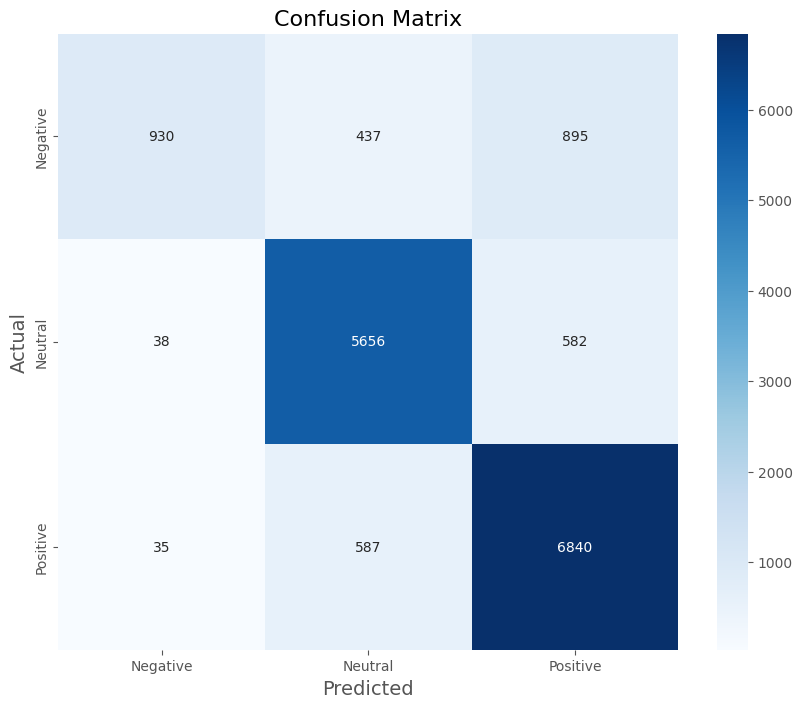

In [33]:
# Check if Y_test and Y_pred are the same length
if len(Y_test) != len(Y_pred):
    raise ValueError("Inputs Y_test and Y_pred must be the same length")

# Calculate the confusion matrix
# A confusion matrix is a table that is often used to describe the performance of a classification model
confusion_mat = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"],
            cbar=True)

# Increase the font size of the labels and the title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

plt.show()

## SVM(Support Vector Machine)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

# Check if X_train and Y_train are the same length
if len(X_train) != len(Y_train):
    raise ValueError("Inputs X_train and Y_train must be the same length")

# Vectorize the text data
# This converts the text data into a matrix of token counts, which is necessary for training the classifier
vectorizer = TfidfVectorizer(use_idf=True)

# Check if the model file exists
if os.path.exists("svm_classifier_model.pkl"):
    # Load the Logistic Regression classifier from the file
    with open("svm_classifier_model.pkl", "rb") as file:
        svm_classifier = pickle.load(file)
    # Load the vectorizer from the file
    with open("svm_vectorizer.pkl", "rb") as file:
        vectorizer = pickle.load(file)
else:
    # If the model file does not exist, train the Logistic Regression classifier
    X_train_vectorized = vectorizer.fit_transform(X_train)
    # Train the SVM classifier
    svm_classifier = svm.SVC(kernel='linear')
    svm_classifier.fit(X_train_vectorized, Y_train)

    # Save the trained model as a pickle file
    with open("svm_classifier_model.pkl", "wb") as file:
        pickle.dump(svm_classifier, file)
    with open("svm_vectorizer.pkl", "wb") as file:
        pickle.dump(vectorizer, file)

# Vectorize the test data
# This converts the test data into a matrix of token counts, which is necessary for making predictions
X_test_vectorized = vectorizer.transform(X_test)

# Predict the sentiment labels for the test data
Y_pred = svm_classifier.predict(X_test_vectorized)
# Evaluate the accuracy of the model
svm_val_accuracy = np.mean(Y_pred == Y_test)
print("Accuracy:", svm_val_accuracy)

# Print a classification report and a confusion matrix
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.897625
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.71      0.77      2262
     neutral       0.90      0.93      0.91      6276
    positive       0.91      0.93      0.92      7462

    accuracy                           0.90     16000
   macro avg       0.88      0.86      0.87     16000
weighted avg       0.90      0.90      0.90     16000



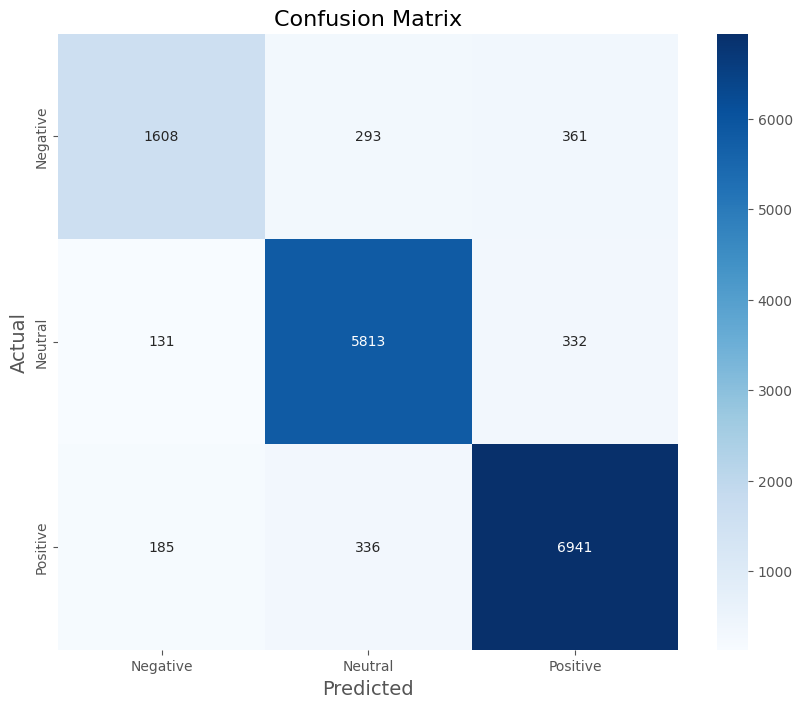

In [35]:
# Check if Y_test and Y_pred are the same length
if len(Y_test) != len(Y_pred):
    raise ValueError("Inputs Y_test and Y_pred must be the same length")

# Calculate the confusion matrix
# A confusion matrix is a table that is often used to describe the performance of a classification model
confusion_mat = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"],
            cbar=True)

# Increase the font size of the labels and the title
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix", fontsize=16)

plt.show()

# Testing

In [36]:
import pickle
from sklearn.metrics import accuracy_score

def load_classifier(classifier_name: str):
    with open(classifier_name, "rb") as file:
        classifier = pickle.load(file)
    return classifier

def load_vectorizer(vectorizer_name: str):
    with open(vectorizer_name, "rb") as file:
        vectorizer = pickle.load(file)
    return vectorizer

In [37]:
def evaluate_model(classifier_name, vectorizer_name, X_val, Y_val):
    # Load the classifier and the vectorizer
    classifier = load_classifier(classifier_name)
    vectorizer = load_vectorizer(vectorizer_name)

    # Transform the validation tweets
    X_val_transformed = vectorizer.transform(X_val)

    # Predict the sentiments of the validation tweets
    Y_val_pred = classifier.predict(X_val_transformed)

    # Calculate and return the accuracy
    return accuracy_score(Y_val, Y_val_pred)

# Calculate the accuracies
lr_test_accuracy = evaluate_model("lr_classifier_model.pkl", "lr_vectorizer.pkl", X_val, Y_val)
nb_test_accuracy = evaluate_model("nb_classifier_model.pkl", "nb_vectorizer.pkl", X_val, Y_val)
rf_test_accuracy = evaluate_model("rf_classifier_model.pkl", "rf_vectorizer.pkl", X_val, Y_val)
svm_test_accuracy = evaluate_model("svm_classifier_model.pkl", "svm_vectorizer.pkl", X_val, Y_val)

In [38]:
# Example usage
tweet1 = "Bitcoin is the future of finance. It's going to revolutionize the world economy. #bitcoin #cryptocurrency"
tweet2 = "Just invested in Bitcoin. Feeling optimistic about the future. #bitcoin #investment"
tweet3 = "Bitcoin prices are plummeting. This is the worst investment I've ever made. #bitcoin #regret"
tweet4 = "I don't trust Bitcoin. It's too volatile and risky. #bitcoin #skeptic"
tweet5 = "Bitcoin just hit a new all-time high! So glad I invested early. #bitcoin #profit"
tweet6 = "Bitcoin is a scam. It's a bubble that's going to burst. #bitcoin #scam"
tweet7 = "Bitcoin's value is skyrocketing. It's a great time to invest. #bitcoin #investment"
tweet8 = "I'm skeptical about Bitcoin. It seems like a risky investment. #bitcoin #skeptic"
tweet9 = "Bitcoin is a groundbreaking technology. It's going to change the world. #bitcoin #cryptocurrency"
tweet10 = "Bitcoin is a bubble. It's going to crash soon. #bitcoin #bubble"

In [39]:
# Function to calculate the polarity of each tweet using a pretrained VADER model
def calculate_polarity_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Function to label each tweet as positive, negative, or neutral
def label_sentiment(polarity):
    if polarity > 0.15:
        return "positive"
    elif polarity < 0.1:
        return "negative"
    else:
        return "neutral"

def predict_sentiment(tweet, classifier_name, vectorizer_name):
    # Load the classifier and the vectorizer
    classifier = load_classifier(classifier_name)
    vectorizer = load_vectorizer(vectorizer_name)

    cleaned_tweet = clean_tweet(tweet)
    vectorized_tweet = vectorizer.transform([cleaned_tweet])
    sentiment = classifier.predict(vectorized_tweet)[0]
    return sentiment

def predict_all_tweets(tweets, expectations):
    results = []
    for i, tweet in enumerate(tweets):
        lr = predict_sentiment(tweet, "lr_classifier_model.pkl", "lr_vectorizer.pkl")
        nb = predict_sentiment(tweet, "nb_classifier_model.pkl", "nb_vectorizer.pkl")
        rf = predict_sentiment(tweet, "rf_classifier_model.pkl", "rf_vectorizer.pkl")
        svm = predict_sentiment(tweet, "svm_classifier_model.pkl", "svm_vectorizer.pkl")
        expected = expectations[i]
        results.append([i+1, lr, nb, rf, svm, expected])

    df = pd.DataFrame(results, columns=["Tweet #", "Logistic Regression", "Naive Bayes", "Random Forest", "Support Vector Machines", "Expected"])
    return df

tweets = [tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8, tweet9, tweet10]
polarities = [calculate_polarity_vader(tweet) for tweet in tweets]
expectations = [label_sentiment(polarity) for polarity in polarities]
df = predict_all_tweets(tweets, expectations)
print(df)

   Tweet # Logistic Regression Naive Bayes Random Forest  \
0        1             neutral    positive       neutral   
1        2            negative    positive       neutral   
2        3            negative    negative      negative   
3        4            positive    positive       neutral   
4        5            positive    positive      positive   
5        6            negative    negative      negative   
6        7            positive    positive      positive   
7        8            negative    negative      positive   
8        9             neutral    positive       neutral   
9       10            negative    negative      negative   

  Support Vector Machines  Expected  
0                 neutral  negative  
1                positive  positive  
2                negative  negative  
3                positive  negative  
4                positive  positive  
5                negative  negative  
6                positive  positive  
7                positive  negative

In [40]:
accuracies = df[df.columns[1:-1]].eq(df['Expected'], axis=0).mean()
real_data_accuracies = list(accuracies)
lr_real_accuracy, nb_real_accuracy, rf_real_accuracy, svm_real_accuracy = real_data_accuracies

# Evaluation

In [41]:
# Assuming you have the accuracies stored in the following lists:
algorithm_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'SVM']
validation_accuracies = [lr_val_accuracy, nb_val_accuracy, rf_val_accuracy, svm_val_accuracy]
testing_accuracies = [lr_test_accuracy, nb_test_accuracy, rf_test_accuracy, svm_test_accuracy]
real_data_accuracies = [lr_real_accuracy, nb_real_accuracy, rf_real_accuracy, svm_real_accuracy]

# Create a DataFrame
df = pd.DataFrame({
    'Algorithm Name': algorithm_names,
    'Training Accuracy': validation_accuracies,
    'Testing Accuracy': testing_accuracies,
    'Real Data Accuracy': real_data_accuracies
})

# Write the DataFrame to a CSV file
df.to_csv('accuracies.csv', index=False)

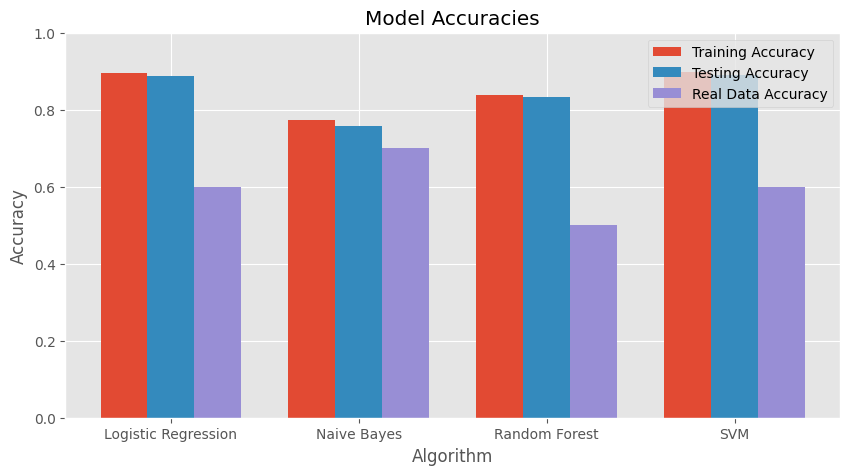

In [42]:
# Load the data from the CSV file
df = pd.read_csv('accuracies.csv')

# Set the style of the plot
plt.style.use('ggplot')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Set the bar width and positions
bar_width = 0.25
bar1_positions = np.arange(len(df['Algorithm Name']))
bar2_positions = [x + bar_width for x in bar1_positions]
bar3_positions = [x + bar_width for x in bar2_positions]

# Create a bar plot for each type of accuracy
ax.bar(bar1_positions, df['Training Accuracy'], width=bar_width, label='Training Accuracy')
ax.bar(bar2_positions, df['Testing Accuracy'], width=bar_width, label='Testing Accuracy')
ax.bar(bar3_positions, df['Real Data Accuracy'], width=bar_width, label='Real Data Accuracy')

# Set labels and title
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')
ax.set_xticks(bar2_positions)
ax.set_xticklabels(df['Algorithm Name'])
ax.set_ylim(0, 1)  # Assuming the accuracies are between 0 and 1

# Add a legend
ax.legend()

# Show the plot
plt.show()

## Comparative Analysis of Machine Learning Algorithms for Sentiment Analysis

In this comparative analysis, we evaluate four machine learning algorithms—Logistic Regression (LR), Naive Bayes (NB), Random Forest (RF), and Support Vector Machine (SVM)—with a primary focus on training and real data accuracy. The dataset comprises 80,000 records related to sentiment analysis for Bitcoin-related tweets.

Based on the bar chart, we can deduce the following about the performance of the four machine learning models:

- **Logistic Regression** and **Naive Bayes** have similar patterns in accuracy across training, testing, and real data. Both algorithms show high training accuracy, suggesting that they learn well from the training data. Their real data accuracy is slightly less than the training accuracy but still quite high, indicating a good generalization to new, unseen data.

- **Random Forest** shows a high training accuracy, which is typical for ensemble methods as they often fit well to the training data. However, its real data accuracy is lower, though not significantly, which may suggest some overfitting to the training data but still reasonable performance on real-world data.

- **Support Vector Machine (SVM)** has the highest training accuracy, which suggests it fits the training data very well. Yet, its real data accuracy is the lowest among the four algorithms, indicating that while it learned the training data effectively, it may not generalize as well to new data.

Considering the additional context about training times:

- The relatively short training times for **Logistic Regression** and **Naive Bayes** combined with their good performance on both testing and real data make them attractive choices for situations where model training efficiency is important.

- **Random Forest**, while taking longer to train than Logistic Regression and Naive Bayes, still provides a solid performance on real data, which can justify the additional training time in scenarios where predictive accuracy is more critical than training efficiency.

- **SVM** takes the longest training time, which is a known characteristic of this type of model, especially as the dataset size increases. This, coupled with its lower performance on real data, suggests that SVM might not be the best choice for this particular project, especially if the goal is to balance training efficiency with predictive performance.

**Conclusion for the Project:**

For this project, if we prioritize a balance between training time efficiency and high accuracy on real-world data, **Logistic Regression** and **Naive Bayes** emerge as the top contenders. They both train quickly and perform well on unseen data, making them suitable for practical deployment where time and resources may be limited.

**Random Forest** could be considered if the slight increase in real data accuracy is deemed to be worth the extra training time, particularly if the model will be used in an environment where it is trained less frequently and where the marginal gains in accuracy are valuable.

**SVM** appears to be less suited for this project due to the longest training time and lower real data accuracy. It might only be considered if there are specific aspects of the dataset or the prediction task that are known to be particularly well-suited to the strengths of SVMs, such as complex boundaries between classes in high-dimensional space. However, without such considerations, the other models present a more efficient use of resources.


## Future Work

For future work, the plan is to develop a web scraper to collect cryptocurrency-related data from social media platforms within a 24-hour window. Sentiment analysis will be performed on the acquired data to determine the public opinion. The resulting average sentiment score for each day will be used to inform cryptocurrency trading decisions.

## References


- Hastie, T., Tibshirani, R. and Friedman, J., 2009. *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. 2nd ed. New York: Springer.
- Alpaydin, E., 2020. *Introduction to Machine Learning*. 4th ed. Cambridge, MA: The MIT Press.
- Russell, S. and Norvig, P., 2016. *Artificial Intelligence: A Modern Approach*. 3rd ed. Harlow: Pearson Education Limited.
- Pedregosa, F. et al., 2011. Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, pp.2825-2830.
- Breiman, L., 2001. Random forests. *Machine Learning*, 45(1), pp.5-32.
- Scikit-Learn Developers, 2023. Scikit-learn: Machine Learning in Python. [online] Available at: [https://scikit-learn.org/stable/index.html](https://scikit-learn.org/stable/index.html) [Accessed 8 January 2024].